In [302]:
from classiq import *
from classiq.execution import ExecutionPreferences

@qfunc
def main(exp_value: Output[QBit]) -> None:
    allocate(1, exp_value)
    target = QArray("target")
    allocate(4,target)  
    within_apply(lambda:H(exp_value),lambda:control(exp_value,lambda:qft(target)))
    

In [325]:
import numpy as np

shot_list =[1000,2000,4000,8000,16000]
experienntal_result={}
for j in range(6):
    pro_zero_lists = []
    theo_value_lists = []
    for i in shot_list:
        qmod = create_model(main)
        qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=i))
        qprog = synthesize(qmod)
        res = execute(qprog).result()[0].value
        
        pro_zero = res.counts["0"]/i
        pro_zero_lists.append(pro_zero)
        theo_value =(2 * res.counts["0"] / i) - 1
        theo_value_lists.append(theo_value)
    experienntal_result.update({j:theo_value_lists})


In [212]:
print(experienntal_result)

{0: [0.238, 0.23199999999999998, 0.2529999999999999, 0.23724999999999996, 0.24875000000000003], 1: [0.278, 0.22399999999999998, 0.2695000000000001, 0.23849999999999993, 0.24950000000000006], 2: [0.22199999999999998, 0.2669999999999999, 0.254, 0.24249999999999994, 0.2466250000000001], 3: [0.25, 0.2629999999999999, 0.2529999999999999, 0.24875000000000003, 0.2546250000000001], 4: [0.30600000000000005, 0.256, 0.272, 0.2689999999999999, 0.2502500000000001]}


In [410]:
experienntal_result

{0: [0.262,
  0.2410000000000001,
  0.25449999999999995,
  0.25075000000000003,
  0.24849999999999994],
 1: [0.276,
  0.28800000000000003,
  0.2250000000000001,
  0.24425000000000008,
  0.2617499999999999],
 2: [0.254,
  0.2789999999999999,
  0.25649999999999995,
  0.25150000000000006,
  0.2669999999999999],
 3: [0.268, 0.258, 0.264, 0.2470000000000001, 0.25649999999999995],
 4: [0.20199999999999996,
  0.242,
  0.24950000000000006,
  0.24225000000000008,
  0.24649999999999994],
 5: [0.30000000000000004,
  0.27,
  0.2729999999999999,
  0.23225000000000007,
  0.25475000000000003,
  4014.2,
  4014.2,
  4014.2,
  4014.2,
  4014.2]}

In [400]:
print(len(experienntal_result))

6


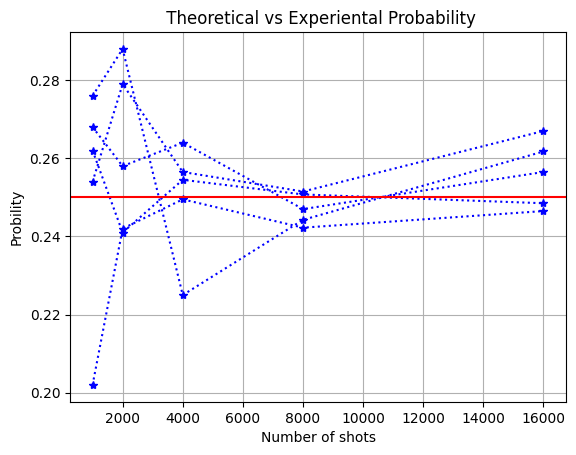

In [409]:
import matplotlib.pyplot as plt
#As theoretical value of <0|UQFT|0> = 0.25
theoretical_value  = 0.25

# Labels for the plot
plt.xlabel("Number of shots")
plt.ylabel("Probility")

for i in range(5):
    plt.plot(shot_list,experienntal_result[i],marker='*',linestyle='dotted',color='b' , label=f"{i} Experiment result")
plt.axhline(y=theoretical_value, color='r', linestyle='-', label='Theoretical Value of Re(⟨0|QFT|0⟩)')
# Add legend
# plt.legend()
# plt.legend().set_title("Synthesize result")
# Title for the plot (optional)
plt.title(" Theoretical vs Experiental Probability")

# Show the plot
plt.grid(True)
plt.show()

In [415]:

def find_bigger_smaller(data):
  """
  This function takes a dictionary where keys are integers and values are lists of numbers.
  It returns two dictionaries: one containing lists of bigger numbers for each key,
  and another containing lists of smaller numbers for each key.
  """
  bigger_numbers = {}
  smaller_numbers = {}
  for key, array in data.items():
    current_number = array[0]  # Use the first element as reference initially
    bigger = []
    smaller = []
    for num in array:
      if num > current_number:
        bigger.append(num)
      elif num < current_number:
        smaller.append(num)
      current_number = num  # Update reference for comparison

    bigger_numbers[key] = bigger
    smaller_numbers[key] = smaller
  return bigger_numbers, smaller_numbers

# Example usage
data = {0: [0.262, 0.241, 0.2545, 0.25075, 0.2485],
        1: [0.276, 0.288, 0.225, 0.24425, 0.26175],
        2: [0.254, 0.279, 0.2565, 0.2515, 0.267],
        3: [0.268, 0.258, 0.264, 0.247, 0.2565],
        4: [0.202, 0.242, 0.2495, 0.24225, 0.2465],
        5: [0.30000000000000004, 0.27, 0.273, 0.23225, 0.25475, 4014.2, 4014.2, 4014.2, 4014.2]}

bigger_numbers, smaller_numbers = find_bigger_smaller(data)
bigger_numbers

{0: [0.2545],
 1: [0.288, 0.24425, 0.26175],
 2: [0.279, 0.267],
 3: [0.264, 0.2565],
 4: [0.242, 0.2495, 0.2465],
 5: [0.273, 0.25475, 4014.2]}

In [223]:
import statistics
data = {
    0: [0.238, 0.23199999999999998, 0.2529999999999999, 0.23724999999999996, 0.24875000000000003],
    1: [0.278, 0.22399999999999998, 0.2695000000000001, 0.23849999999999993, 0.24950000000000006],
    2: [0.22199999999999998, 0.2669999999999999, 0.254, 0.24249999999999994, 0.2466250000000001],
    3: [0.25, 0.2629999999999999, 0.2529999999999999, 0.24875000000000003, 0.2546250000000001],
    4: [0.30600000000000005, 0.256, 0.272, 0.2689999999999999, 0.2502500000000001]
}

# Flatten the dictionary into a single list
all_numbers = [num for inner_list in data.values() for num in inner_list]

# Calculate the mean
mean_of_all = statistics.mean(all_numbers)

print(f"Mean of all numbers: {mean_of_all}")

Mean of all numbers: 0.25293


In [191]:
shot_list =[1000,2000,4000,8000,16000]
pro_1 = [609,1245,2481,4940,9909]
pro2=[]
pro = [0.609,0.6225,0.62025,0.6193125]
for i in range(5):
    # pro2.append(pro_1[i]/shot_list[i])
    pro2.append(2*pro_1[i]/shot_list[i]-1)
print(pro2)

[0.21799999999999997, 0.2450000000000001, 0.24049999999999994, 0.2350000000000001, 0.2386250000000001]


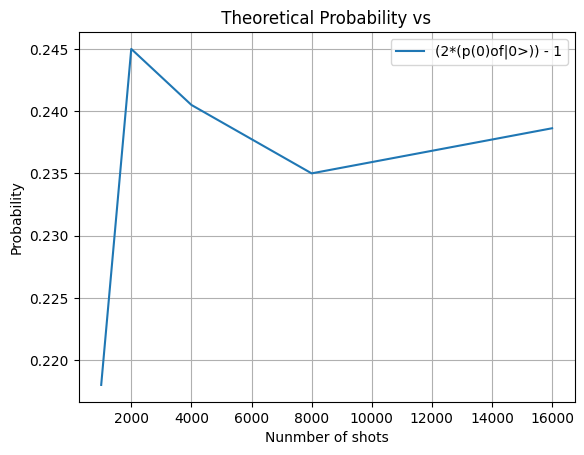

In [194]:
import matplotlib.pyplot as plt
shot_list =[1000,2000,4000,8000,16000]
pro_O = [0.609, 0.6225, 0.62025, 0.6175, 0.6193125]
b=[0.61, 0.62, 0.62, 0.62, 0.62]
c=[0.21799999999999997, 0.2450000000000001, 0.24049999999999994, 0.2350000000000001, 0.2386250000000001]
# Data (assuming the values are probabilities)

# Labels for the plot
plt.xlabel("Nunmber of shots")
plt.ylabel("Probability")

# Plot p(0) values
# plt.plot(shot_list, pro_zero_lists, label="p(0) of |0>")

# Plot 2*p(0) - 1 values (assuming these represent another probability)
plt.plot(shot_list, c, label="(2*(p(0)of|0>)) - 1")

# Add legend
plt.legend()

# Title for the plot (optional)
plt.title(" Theoretical Probability vs ")

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# thero_value =2 * res.counts["0"] / sum(res.counts.values()) - 1
    # exact_overlap = np.abs(amps1 @ amps2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(shot_list,expectation_values,label="Measure Expectation Value")
plt.exhline(y=1.0, color="r",linestyle ="..", label"Theoretical value")
plt.xlabel("Number OF short")
plt.ylabel("expectation")
plt.legend()
plt.show

In [90]:
shot_list =[1000,2000,4000,8000,16000]
results = []
exp_results=[]
for i in shot_list:

    qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=i))
    qprog = synthesize(qmod) 
    res = execute(qprog).result()[0].value.parsed_counts
    # res = execute(qprog).result()
    
    final_expectation= 2 * res[0].value.counts["0"] - 1
    results.append(res)
    exp_results.append(final_expectation) 

In [100]:
print(results.value)


AttributeError: 'list' object has no attribute 'value'

In [ ]:
final_expectation= 2 * res[0].value.counts["0"] - 1
exact_overlap = np.abs(amps1 @ amps2)

In [ ]:
res = execute(qprog).result()

In [84]:
for i in short_list)
qmod = set_execution_preferences(
    qmod, execution_preferences=ExecutionPreferences(num_shots=1000)
)
qprog = synthesize(qmod) 

In [85]:
# from classiq import show
# show(qprog)

Opening: https://platform.classiq.io/circuit/87118807-b7d9-4481-b522-878a214352d8?version=0.42.2


In [ ]:
#############

In [389]:
# Define the quantum function
@qfunc
def main(expectation_value: Output[QBit]):
    allocate(1, expectation_value)
    psi = QArray[QBit](name="psi")
    allocate(4, psi)
    hadamard_transform(expectation_value)
    control(ctrl=expectation_value, operand=lambda: qft(psi))
    hadamard_transform(expectation_value)

In [385]:
def execute_quantum_program(num_shots):
    quantum_model = create_model(main)
    quantum_model_with_execution_preferences = set_execution_preferences(
        quantum_model,
        ExecutionPreferences(num_shots=num_shots, 
                             job_name=str(num_shots) + " - execution", random_seed=767),)
    quantum_program_with_execution_preferences = synthesize(quantum_model_with_execution_preferences)
    job = execute(quantum_program_with_execution_preferences)
    results = job.result()[0].value.counts["0"]
    return results

In [388]:

shots = [1000, 2000, 4000, 8000, 16000]
results_list = [execute_quantum_program(shot) for shot in shots]

In [387]:
print(results_list)

[602, 1220, 2451, 4959, 9956]


In [379]:
# Calculate the expectation values
expectation_values = []
for i in range(len(results_list)):
    expectation_value =(2 * results_list[i] / shots[i]) - 1
    expectation_values.append(expectation_value)


In [380]:
print(expectation_values)

[0.20399999999999996, 0.21999999999999997, 0.22550000000000003, 0.2397499999999999, 0.24449999999999994]


In [384]:
plt.figure(figsize=(10, 6))
plt.plot(shots, expectation_values, marker='*',linestyle='-', color='b', label='Experimental')
plt.axhline(y=0.25, color='r', linestyle='-', label='Theoretical Value of Re(⟨0|QFT|0⟩)')
plt.xlabel('Number of Shots')
plt.ylabel('Expectation Value')
plt.title('Expectation Value vs Number of Shots')
plt.legend()
plt.grid(True)
# plt.ylim(0.2, 0.27)  # Set y-axis limits
# plt.xscale('log')  # Use logarithmic scale for x-axis
plt.show()

print('done')

done
